<a href="https://colab.research.google.com/github/Mzhdi/Food_Vision_Pizza_Steak_CNN/blob/main/Pizza_Steak_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-15 12:11:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.127.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  32.6MB/s    in 3.2s    

2023-01-15 12:11:36 (32.6 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



#Inspect Data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [4]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['pizza' 'steak']


In [6]:
data_dir

PosixPath('pizza_steak/train')

In [7]:
#Visualize images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory 
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") 
  print(random_image[0])
  return img


Image shape: (512, 512, 3)
1621763.jpg


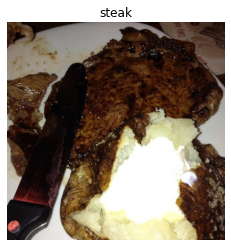

In [8]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [9]:
img

array([[[58, 28,  4],
        [61, 31,  7],
        [77, 47, 23],
        ...,
        [35, 15, 16],
        [35, 15, 16],
        [36, 16, 17]],

       [[65, 35, 11],
        [60, 30,  6],
        [73, 43, 19],
        ...,
        [35, 15, 16],
        [35, 15, 16],
        [35, 15, 16]],

       [[74, 44, 20],
        [61, 31,  7],
        [72, 42, 18],
        ...,
        [34, 14, 15],
        [34, 14, 15],
        [33, 13, 14]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [29, 11,  9],
        [26, 10, 10],
        [25,  9,  9]],

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [27, 12,  9],
        [24, 10,  9],
        [23,  9,  9]],

       [[16, 16, 14],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [28, 12, 12],
        [26, 12, 12],
        [24, 10, 10]]], dtype=uint8)

## Data preprocessing

In [10]:
# Normalize the data
img/255

array([[[0.22745098, 0.10980392, 0.01568627],
        [0.23921569, 0.12156863, 0.02745098],
        [0.30196078, 0.18431373, 0.09019608],
        ...,
        [0.1372549 , 0.05882353, 0.0627451 ],
        [0.1372549 , 0.05882353, 0.0627451 ],
        [0.14117647, 0.0627451 , 0.06666667]],

       [[0.25490196, 0.1372549 , 0.04313725],
        [0.23529412, 0.11764706, 0.02352941],
        [0.28627451, 0.16862745, 0.0745098 ],
        ...,
        [0.1372549 , 0.05882353, 0.0627451 ],
        [0.1372549 , 0.05882353, 0.0627451 ],
        [0.1372549 , 0.05882353, 0.0627451 ]],

       [[0.29019608, 0.17254902, 0.07843137],
        [0.23921569, 0.12156863, 0.02745098],
        [0.28235294, 0.16470588, 0.07058824],
        ...,
        [0.13333333, 0.05490196, 0.05882353],
        [0.13333333, 0.05490196, 0.05882353],
        [0.12941176, 0.05098039, 0.05490196]],

       ...,

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Normalizing the data
train_datagen = ImageDataGenerator(rescale = 1/255)
valid_datagen = ImageDataGenerator( rescale = 1/255)

# Import data from directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                            batch_size = 32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model 
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 0.6037 - accuracy: 0.6693 - val_loss: 0.4563 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4369 - accuracy: 0.8007 - val_loss: 0.3752 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4077 - accuracy: 0.8240 - val_loss: 0.3203 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 13s 272ms/step - loss: 0.3568 - accuracy: 0.8413 - val_loss: 0.2999 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3273 - accuracy: 0.8627 - val_loss: 0.3073 - val_accuracy: 0.8620


In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Image shape: (512, 512, 3)
926414.jpg
Image shape: (512, 382, 3)
214728.jpg


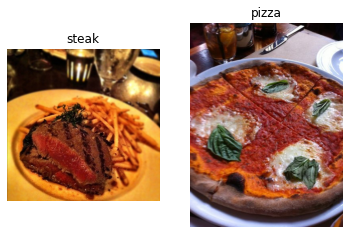

In [16]:
# Visualizing data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


## Evaluate the model

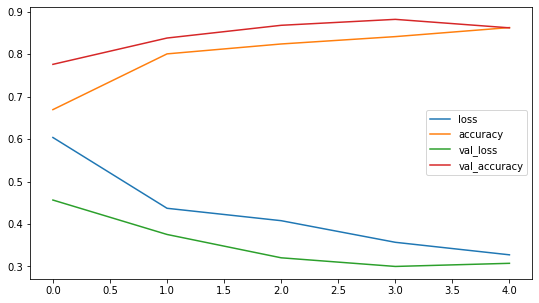

In [29]:
#Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(9,5))

In [30]:
# Plot the validation and training data separately
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

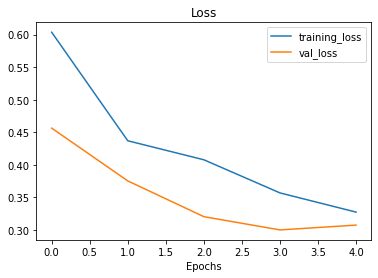

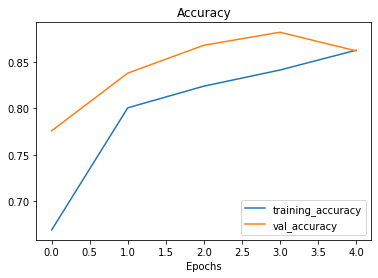

In [31]:
plot_loss_curves(history_1)